In [1]:
# Questo script mi permetterà di leggere i fogli excel nel percorso dato e di creare i grafici necessari per la rappresentazione dei dati

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
path_dir = r'C:\Users\ACER\Desktop\UNIGE MAGISTRALE 1 ANNO\1 SEMESTRE\HIGH PERFORMANCE COMPUTING\ESAME 2\Results\extracted_data_table'


In [3]:
# list of all the files in the directory
files = os.listdir(path_dir)

# list of all the files that are excel files
excel_files = [f for f in files if f.endswith('.xlsx')]
print(excel_files)

['risultati_unified_memory_1024.xlsx', 'risultati_unified_memory_512.xlsx', 'risultati_use_global_memory_1000.xlsx', 'risultati_use_global_memory_1024.xlsx', 'risultati_use_global_memory_512.xlsx', 'risultati_use_pitched_memory_1000.xlsx', 'risultati_use_pitched_memory_1024.xlsx', 'risultati_use_pitched_memory_512.xlsx', 'tile_matrix_configurations.xlsx', 'tile_matrix_unified_memory.xlsx']


In [4]:
file_path = os.path.join(path_dir, excel_files[1])
print(file_path)

C:\Users\ACER\Desktop\UNIGE MAGISTRALE 1 ANNO\1 SEMESTRE\HIGH PERFORMANCE COMPUTING\ESAME 2\Results\extracted_data_table\risultati_unified_memory_512.xlsx


In [5]:
def read_excel_data(file_path):
    # Leggere i dati dai due fogli del file Excel
    valid_config = pd.read_excel(file_path, sheet_name='Valid Configurations')
    invalid_config = pd.read_excel(file_path, sheet_name='Invalid Configurations')
    return valid_config, invalid_config

In [6]:
def create_thread_matrix(valid_config, invalid_config, sig_figs=2):
    # Creare una tabella quadrata da 1 a 1024 (2^0 a 2^10) con dtype stringa
    size = 11
    thread_range = [2**i for i in range(size)]
    thread_matrix = pd.DataFrame(index=thread_range, columns=thread_range, dtype=str)

    # Popolare la tabella con i dati dalle configurazioni valide
    for index, row in valid_config.iterrows():
        thread_x, thread_y = parse_thread_block_size(row['Thread Size'])
        mean_time = round_to_significant_figures(row['Mean Time (ms)'], sig_figs)
        thread_matrix.at[thread_x, thread_y] = str(mean_time)
    
    # Popolare la tabella con "N.S." per le configurazioni non valide
    for index, row in invalid_config.iterrows():
        thread_x, thread_y = parse_thread_block_size(row['Thread Size'])
        thread_matrix.at[thread_x, thread_y] = 'N.S.'
    
    # Riempi le celle vuote con "N.S."
    thread_matrix = thread_matrix.fillna('N.S.')
    return thread_matrix

In [7]:
def parse_thread_block_size(size_str):
    # Parse the string to extract thread and block sizes
    size_str = size_str.strip('()')
    sizes = size_str.split(',')
    thread_size = (int(sizes[0].strip()), int(sizes[1].strip()))
    return thread_size

In [8]:
def round_to_significant_figures(value, sig_figs):
    if value == 0:
        return 0
    return round(value, sig_figs - int(np.floor(np.log10(abs(value)))) - 1)

In [9]:
def plot_thread_matrix(thread_matrix, save_path=None, title=None):
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))
    plt.colorbar(cax)
    
    for (i, j), val in np.ndenumerate(thread_matrix):
        ax.text(j, i, val, ha='center', va='center', color='white')
    
    plt.xticks(range(len(thread_matrix.columns)), thread_matrix.columns)
    plt.yticks(range(len(thread_matrix.index)), thread_matrix.index)
    plt.xlabel('Thread Y')
    plt.ylabel('Thread X')
    plt.title('Mean Time (ms) for Thread Configurations')

    if save_path:
        plt.savefig(f"{save_path}/{file_name}")
    
    plt.show()

In [148]:
save_path = r'C:\Users\ACER\Desktop\UNIGE MAGISTRALE 1 ANNO\1 SEMESTRE\HIGH PERFORMANCE COMPUTING\ESAME 2\Results\extracted_data_graph'
file_name = excel_files[1].replace('.xlsx', '.png')

C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


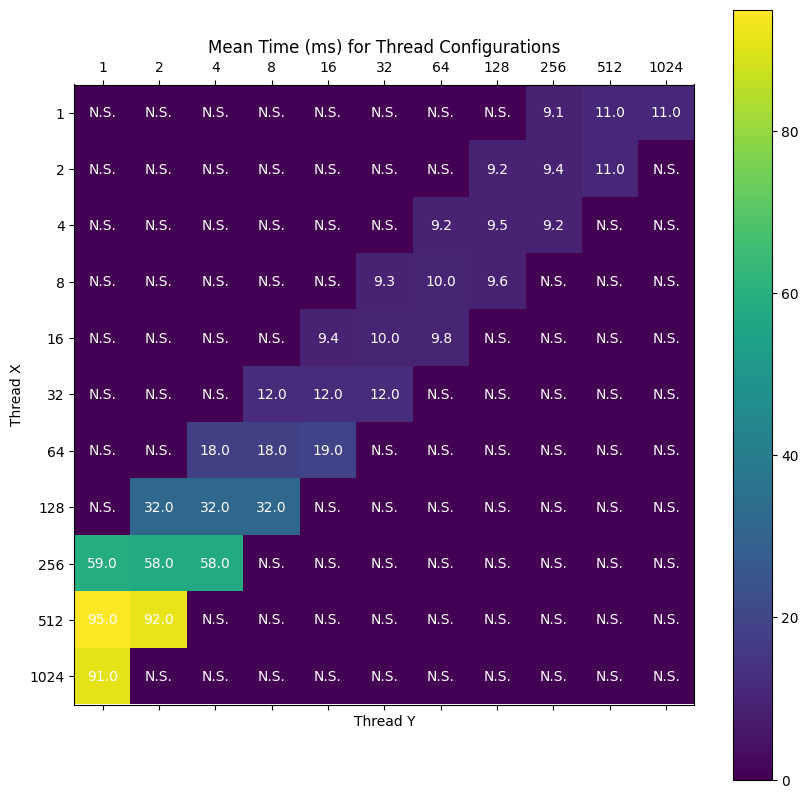

In [149]:
# Esegui le funzioni per leggere i dati, creare la matrice e visualizzarla
valid_config, invalid_config = read_excel_data(file_path)
thread_matrix = create_thread_matrix(valid_config, invalid_config)
plot_thread_matrix(thread_matrix, save_path)

In [151]:
print(excel_files)

['risultati_unified_memory_1024.xlsx', 'risultati_unified_memory_512.xlsx', 'risultati_use_global_memory_1000.xlsx', 'risultati_use_global_memory_1024.xlsx', 'risultati_use_global_memory_512.xlsx', 'risultati_use_pitched_memory_1000.xlsx', 'risultati_use_pitched_memory_1024.xlsx', 'risultati_use_pitched_memory_512.xlsx']


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


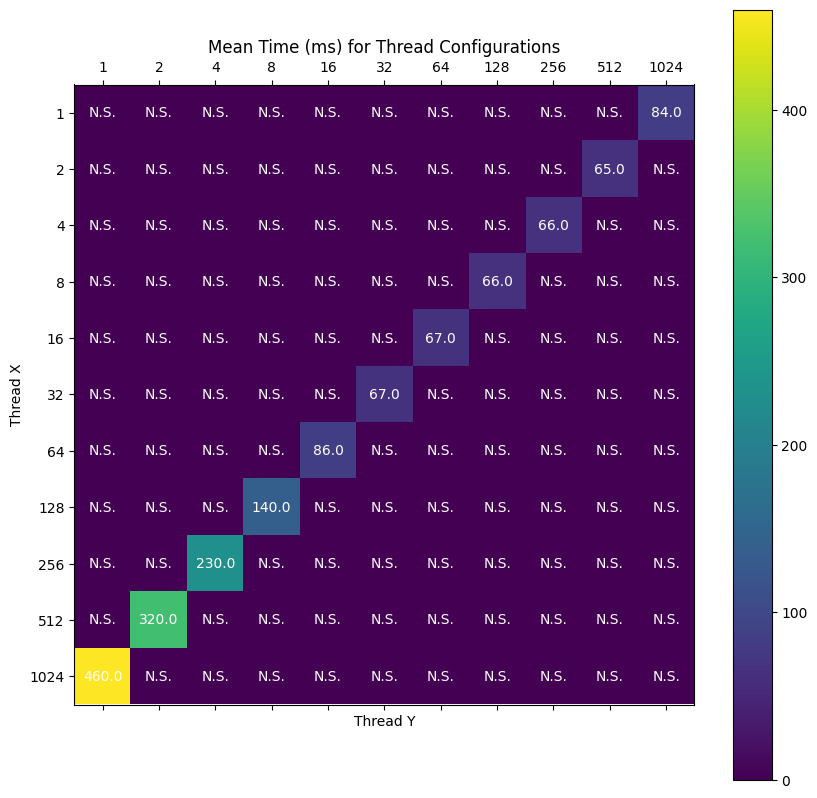

Graph for risultati_unified_memory_1024.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


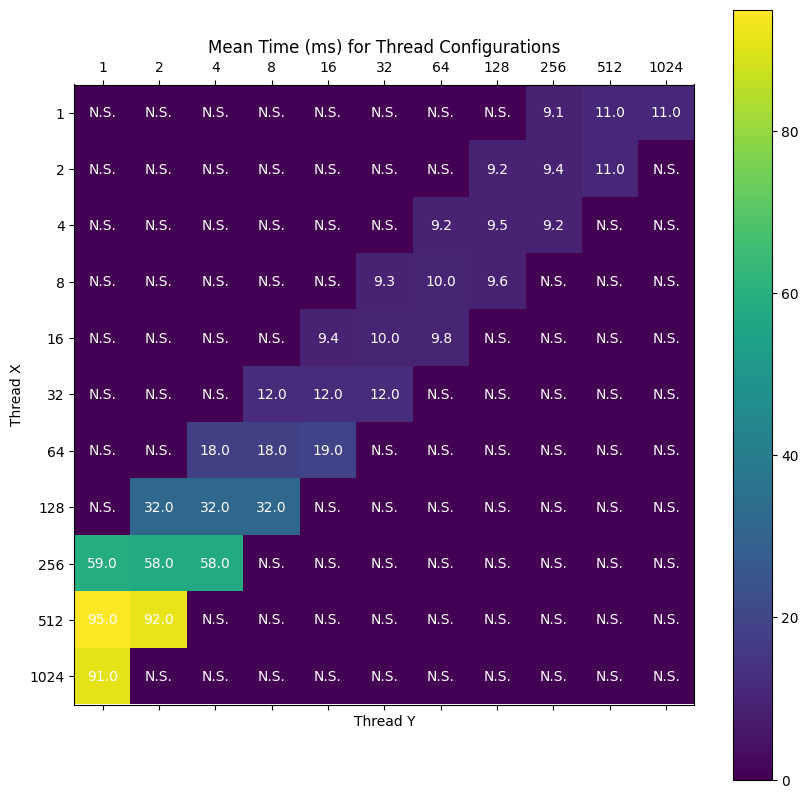

Graph for risultati_unified_memory_512.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


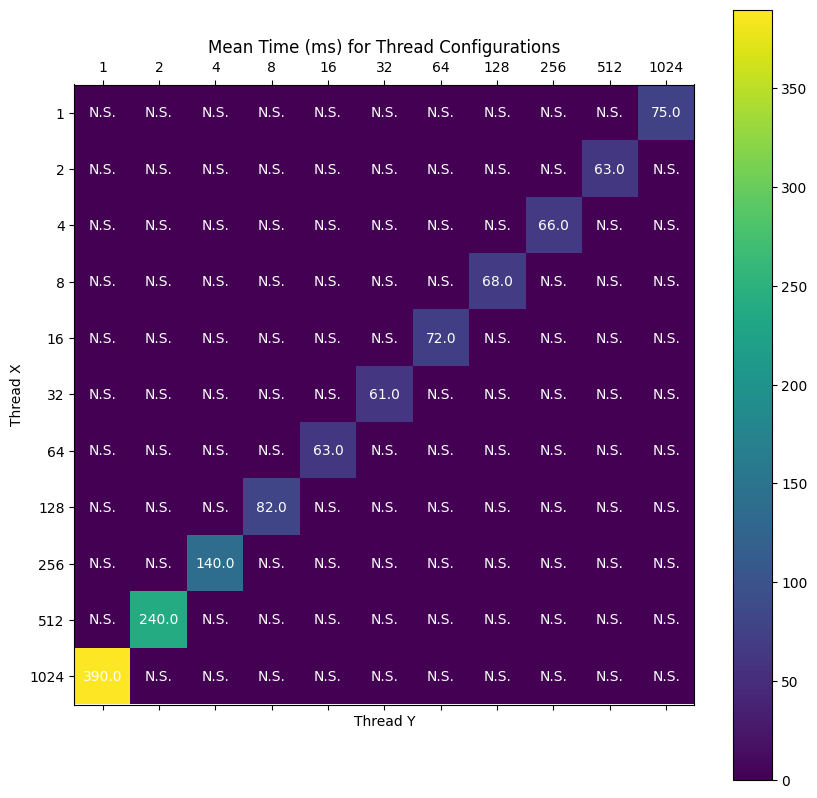

Graph for risultati_use_global_memory_1000.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


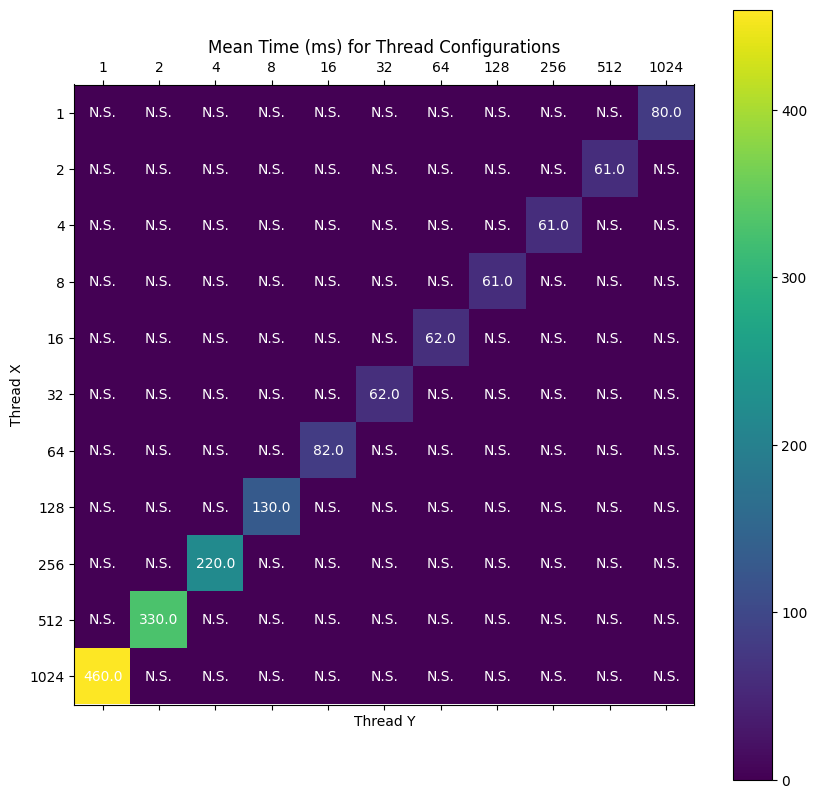

Graph for risultati_use_global_memory_1024.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


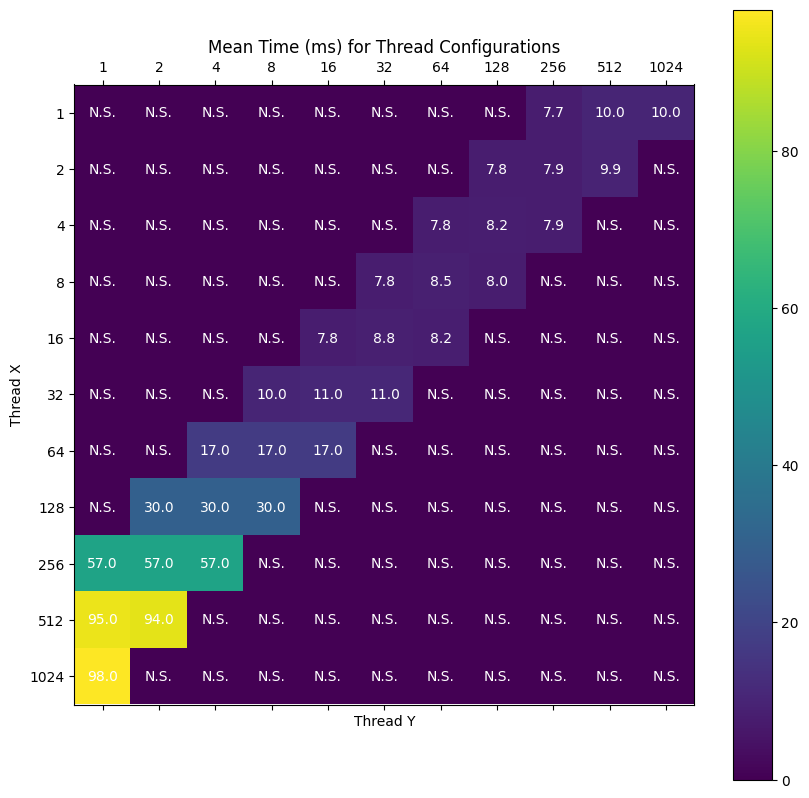

Graph for risultati_use_global_memory_512.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


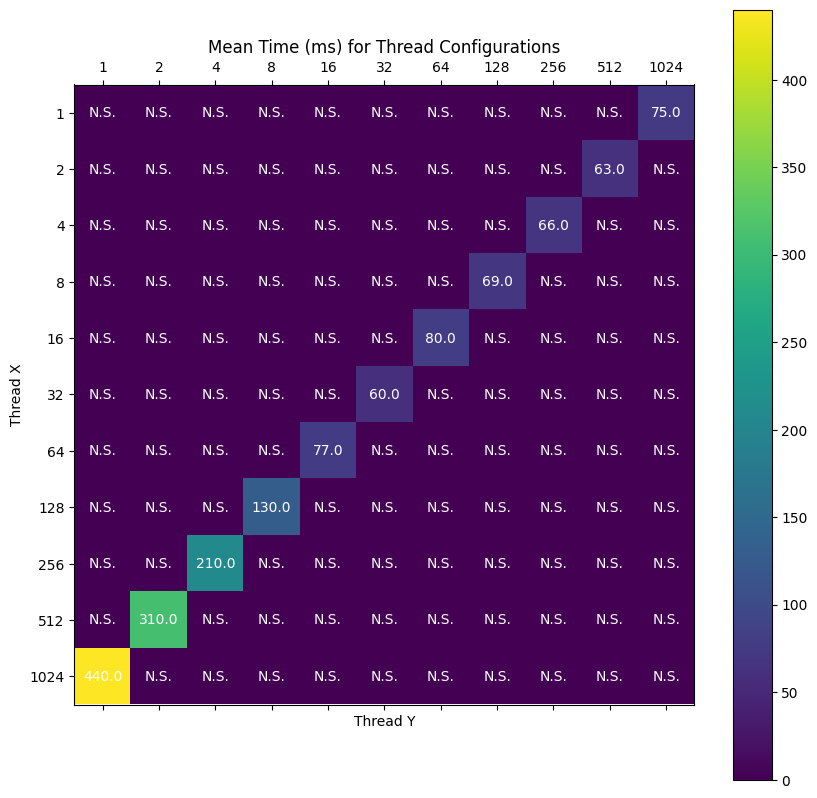

Graph for risultati_use_pitched_memory_1000.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


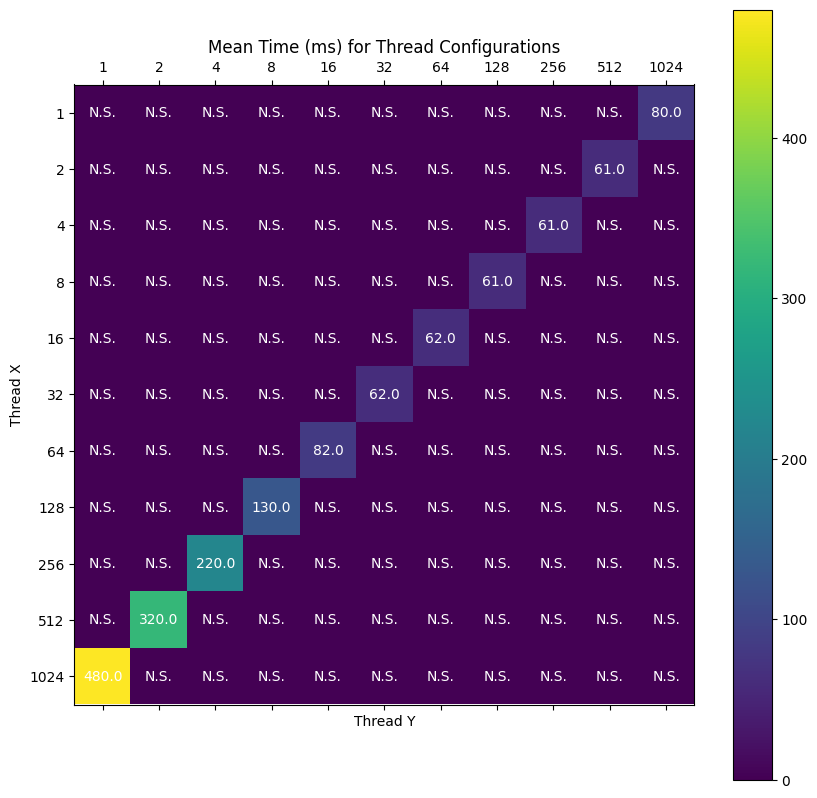

Graph for risultati_use_pitched_memory_1024.xlsx has been created and saved


C:\Users\ACER\AppData\Local\Temp\ipykernel_45088\4032517811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cax = ax.matshow(thread_matrix.applymap(lambda x: 0 if x == 'N.S.' else float(x)))


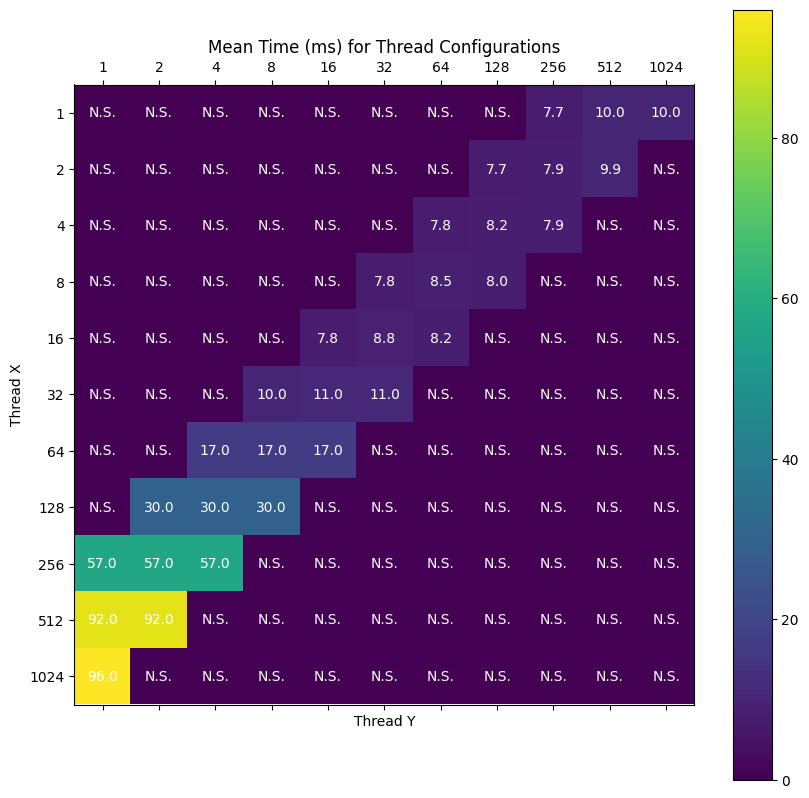

Graph for risultati_use_pitched_memory_512.xlsx has been created and saved


In [159]:
# Proviamo a fare il grafico e a salvare l'immagine per tutti i file excel:
# 'risultati_unified_memory_1024.xlsx' , 'risultati_unified_memory_512.xlsx'
# 'risultati_use_global_memory_1000.xlsx', 'risultati_use_global_memory_1024.xlsx' 
# 'risultati_use_global_memory_512.xlsx', 'risultati_use_pitched_memory_1000.xlsx'
# 'risultati_use_pitched_memory_1024.xlsx', 'risultati_use_pitched_memory_512.xlsx'

for file in excel_files:
    file_name = file.replace('.xlsx', '.png')
    file_path = os.path.join(path_dir, file)
    valid_config, invalid_config = read_excel_data(file_path)
    thread_matrix = create_thread_matrix(valid_config, invalid_config)
    plot_thread_matrix(thread_matrix, save_path, file.replace('.xlsx', '.png'))
    print(f"Graph for {file} has been created and saved")

# Ora lavoriamo con sharee_table

In [10]:
file_path_shared = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_configurations.xlsx"

In [13]:
file_path_shared = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_configurations_test.xlsx"

In [14]:
df = pd.read_excel(file_path_shared)

# Filtro i dati
df_tile_size_2000 = df[df['Matrix Size'] == 2000]
df_tile_size_32 = df[df['Tile Size'] == 32 ]

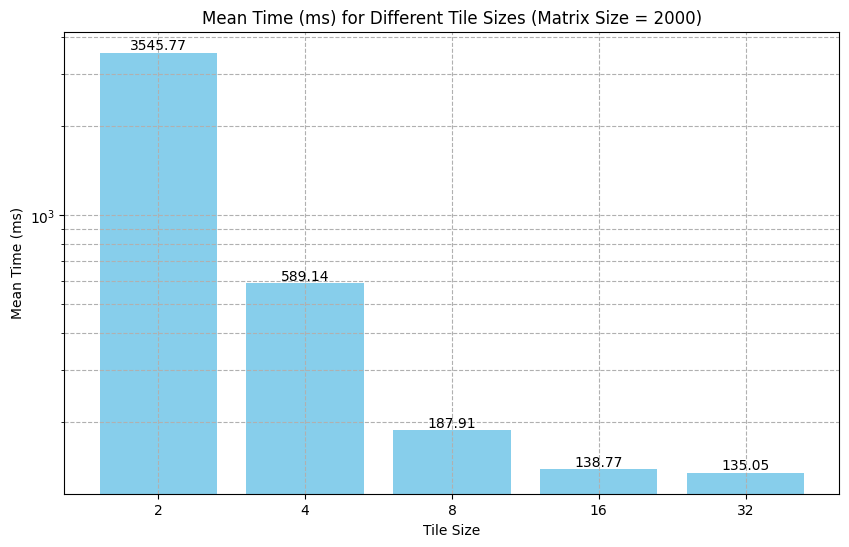

In [15]:
# Grafico 1: Tempo medio di esecuzione per diverse Tile Size con Matrix Size = 2000
plt.figure(figsize=(10, 6))
bars = plt.bar(df_tile_size_2000['Tile Size'].astype(str), df_tile_size_2000['Mean Time (ms)'], color='skyblue')
plt.xlabel('Tile Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Different Tile Sizes (Matrix Size = 2000)')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.grid(True, which="both", ls="--")

# Aggiungere etichette ai valori delle barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\tile_size_vs_mean_time_test.png')
plt.show()

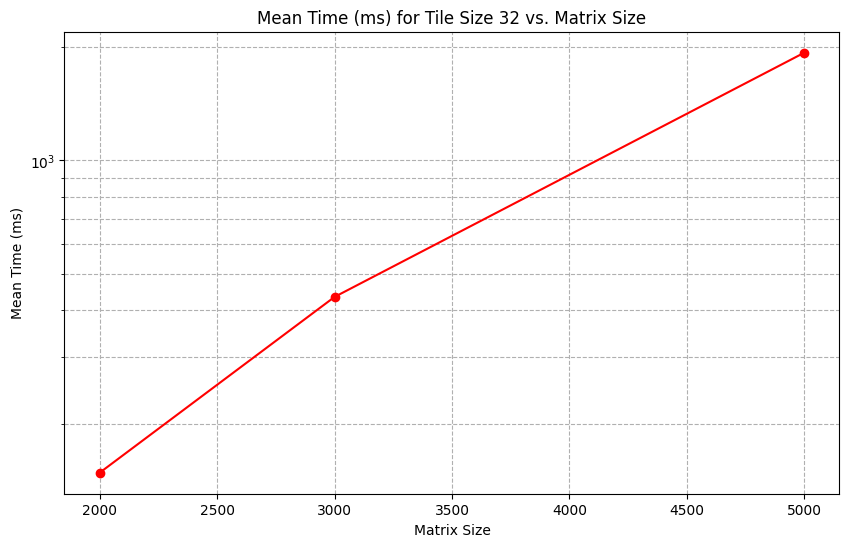

In [164]:
# Grafico 2: Tempo medio di esecuzione per Tile Size = 32 al variare della dimensione della matrice
plt.figure(figsize=(10, 6))
plt.plot(df_tile_size_32['Matrix Size'], df_tile_size_32['Mean Time (ms)'], marker='o', color='red')
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Tile Size 32 vs. Matrix Size')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.grid(True, which="both", ls="--")
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\matrix_size_vs_mean_time.png')
plt.show()

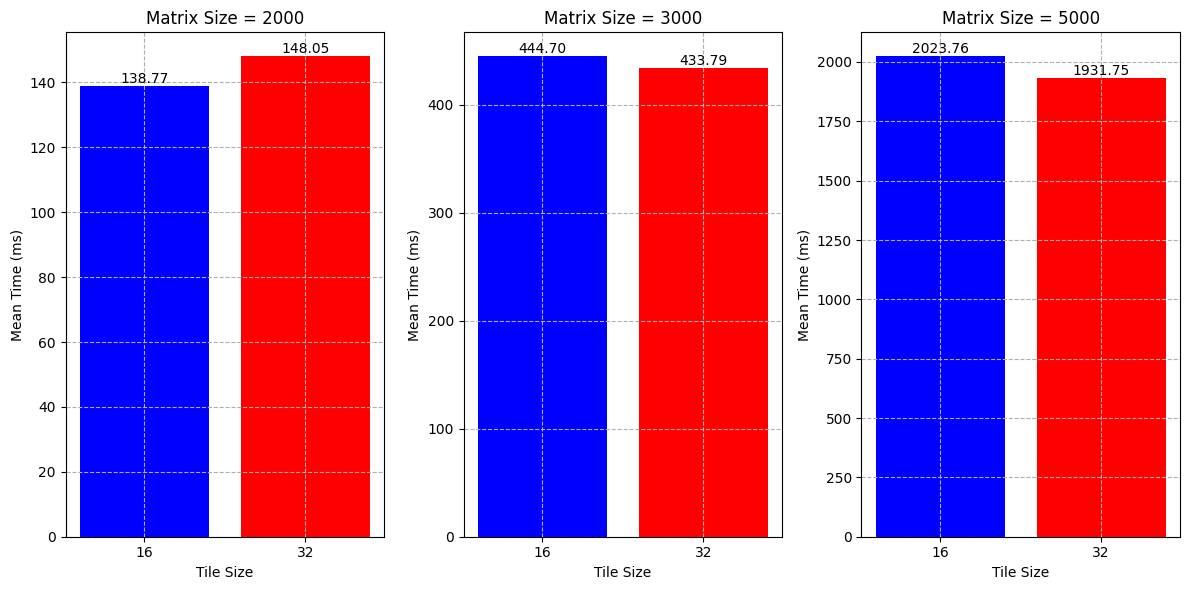

In [169]:
# Grafico 2: Tempo medio di esecuzione per Tile Size = 16 e 32 al variare della dimensione della matrice
matrix_sizes = [2000, 3000, 5000]
tile_sizes = [16, 32]

plt.figure(figsize=(12, 6))

for i, matrix_size in enumerate(matrix_sizes):
    df_filtered = df[(df['Matrix Size'] == matrix_size) & (df['Tile Size'].isin(tile_sizes))]
    plt.subplot(1, 3, i+1)
    bars = plt.bar(df_filtered['Tile Size'].astype(str), df_filtered['Mean Time (ms)'], color=['blue', 'red'])
    plt.xlabel('Tile Size')
    plt.ylabel('Mean Time (ms)')
    plt.title(f'Matrix Size = {matrix_size}')
    plt.grid(True, which="both", ls="--")
    
    # Aggiungere etichette ai valori delle barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\matrix_size_vs_tile_size.png')
plt.show()

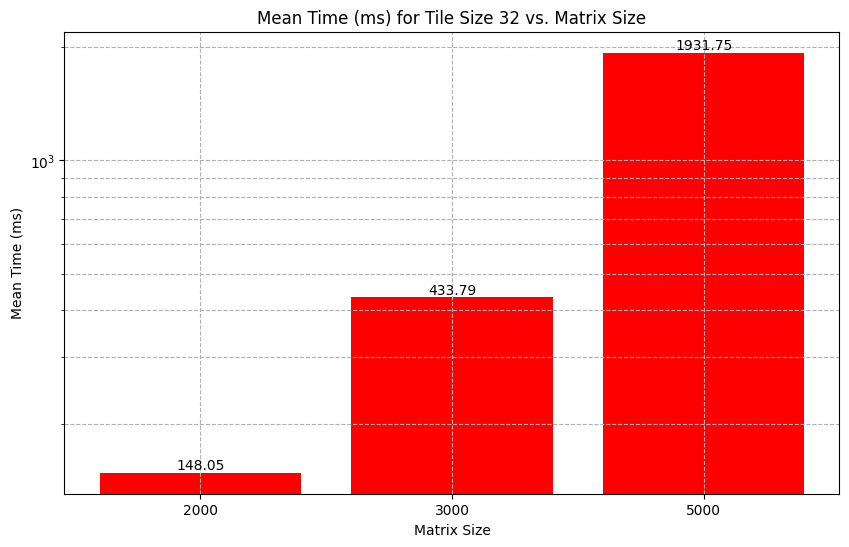

In [171]:
# adesso costrusico due grafici per il confronto tra le diverse dimensionalità del problema con tile size fissata (16/32)

# Grafico 2a: Tempo medio di esecuzione per Tile Size = 32 al variare della dimensione della matrice
matrix_sizes = [2000, 3000, 5000]
tile_size_32 = 32

plt.figure(figsize=(10, 6))
df_filtered_32 = df[(df['Tile Size'] == tile_size_32) & (df['Matrix Size'].isin(matrix_sizes))]
bars_32 = plt.bar(df_filtered_32['Matrix Size'].astype(str), df_filtered_32['Mean Time (ms)'], color='red')
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Tile Size 32 vs. Matrix Size')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.grid(True, which="both", ls="--")

# Aggiungere etichette ai valori delle barre
for bar in bars_32:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\tile_size_32_vs_matrix_size.png')
plt.show()

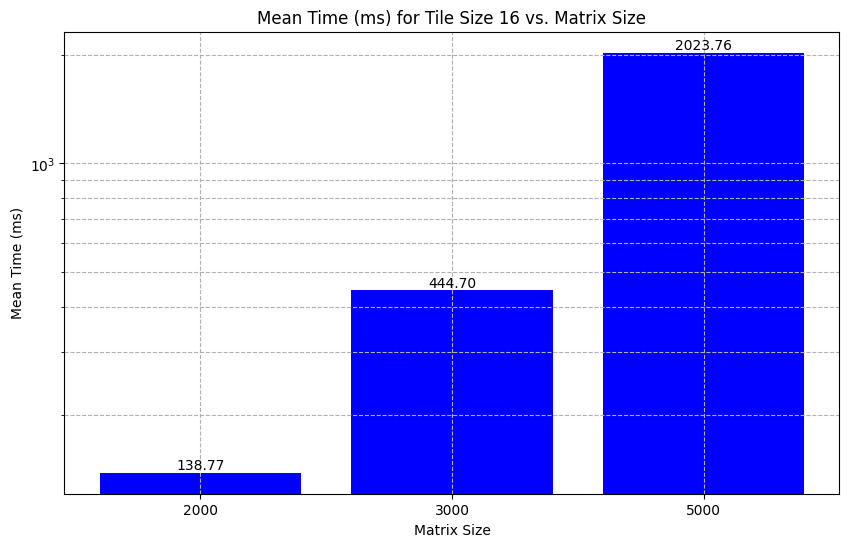

In [172]:
# Grafico 2b: Tempo medio di esecuzione per Tile Size = 16 al variare della dimensione della matrice
tile_size_16 = 16

plt.figure(figsize=(10, 6))
df_filtered_16 = df[(df['Tile Size'] == tile_size_16) & (df['Matrix Size'].isin(matrix_sizes))]
bars_16 = plt.bar(df_filtered_16['Matrix Size'].astype(str), df_filtered_16['Mean Time (ms)'], color='blue')
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Tile Size 16 vs. Matrix Size')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.grid(True, which="both", ls="--")

# Aggiungere etichette ai valori delle barre
for bar in bars_16:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\tile_size_16_vs_matrix_size.png')
plt.show()

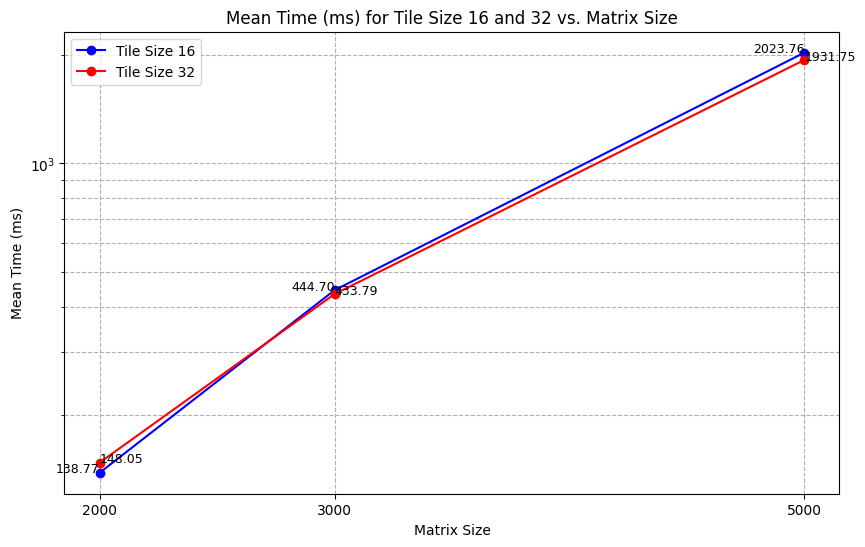

In [183]:
# Percorso del file Excel
file_path = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_configurations.xlsx"

# Leggere i dati dal file Excel
df = pd.read_excel(file_path)

# Filtrare i dati per Tile Size 16 e 32
matrix_sizes = [2000, 3000, 5000]
df_tile_size_16 = df[(df['Tile Size'] == 16) & (df['Matrix Size'].isin(matrix_sizes))]
df_tile_size_32 = df[(df['Tile Size'] == 32) & (df['Matrix Size'].isin(matrix_sizes))]

# Grafico a linee per Tile Size 16 e 32
plt.figure(figsize=(10, 6))

plt.plot(df_tile_size_16['Matrix Size'], df_tile_size_16['Mean Time (ms)'], marker='o', color='blue', label='Tile Size 16')
plt.plot(df_tile_size_32['Matrix Size'], df_tile_size_32['Mean Time (ms)'], marker='o', color='red', label='Tile Size 32')

# Aggiungere etichette ai punti dati
for i, row in df_tile_size_16.iterrows():
    plt.text(row['Matrix Size'], row['Mean Time (ms)'], f"{row['Mean Time (ms)']:.2f}", fontsize=9, ha='right')
for i, row in df_tile_size_32.iterrows():
    plt.text(row['Matrix Size'], row['Mean Time (ms)'], f"{row['Mean Time (ms)']:.2f}", fontsize=9, ha='left')

plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Tile Size 16 and 32 vs. Matrix Size')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.xticks(matrix_sizes)  # Impostare le etichette sull'asse X a 2000, 3000, 5000
plt.grid(True, which="both", ls="--")
plt.legend()

plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\tile_size_vs_matrix_size_line_plot.png')
plt.show()


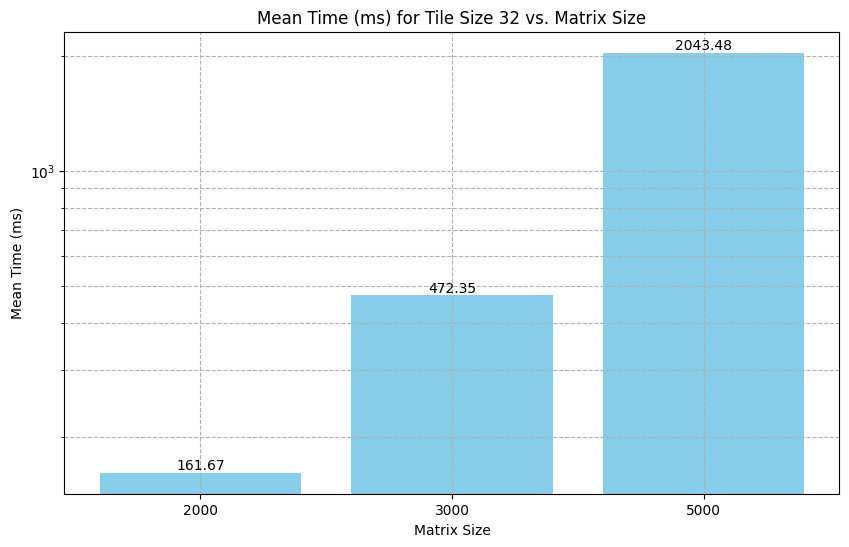

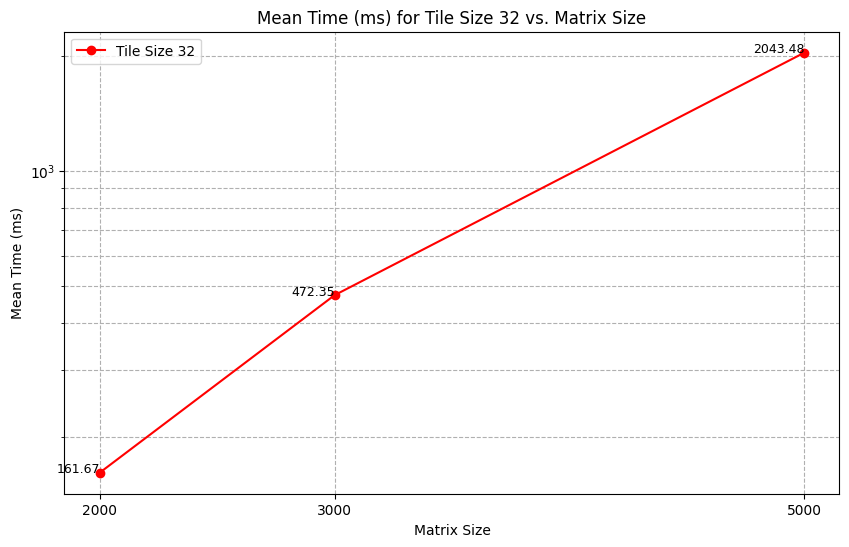

In [184]:
# Percorso del file Excel
file_path = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_unified_memory.xlsx"

# Leggere i dati dal file Excel
df = pd.read_excel(file_path)

# Grafico a barre: Mean Time (ms) per diverse dimensioni della matrice con Tile Size = 32
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Matrix Size'].astype(str), df['Mean Time (ms)'], color='skyblue')
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Tile Size 32 vs. Matrix Size')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.grid(True, which="both", ls="--")

# Aggiungere etichette ai valori delle barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

# Salva il grafico a barre
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\mean_time_vs_matrix_size_bar.png')
plt.show()

# Grafico a linee: Mean Time (ms) per diverse dimensioni della matrice con Tile Size = 32
plt.figure(figsize=(10, 6))
plt.plot(df['Matrix Size'], df['Mean Time (ms)'], marker='o', color='red', label='Tile Size 32')

# Aggiungere etichette ai punti dati
for i, row in df.iterrows():
    plt.text(row['Matrix Size'], row['Mean Time (ms)'], f"{row['Mean Time (ms)']:.2f}", fontsize=9, ha='right')

plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Tile Size 32 vs. Matrix Size')
plt.yscale('log')  # Usare una scala logaritmica per rappresentare meglio i dati
plt.xticks(df['Matrix Size'])  # Impostare le etichette sull'asse X ai valori delle dimensioni della matrice
plt.grid(True, which="both", ls="--")
plt.legend()

# Salva il grafico a linee
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\mean_time_vs_matrix_size_line.png')
plt.show()


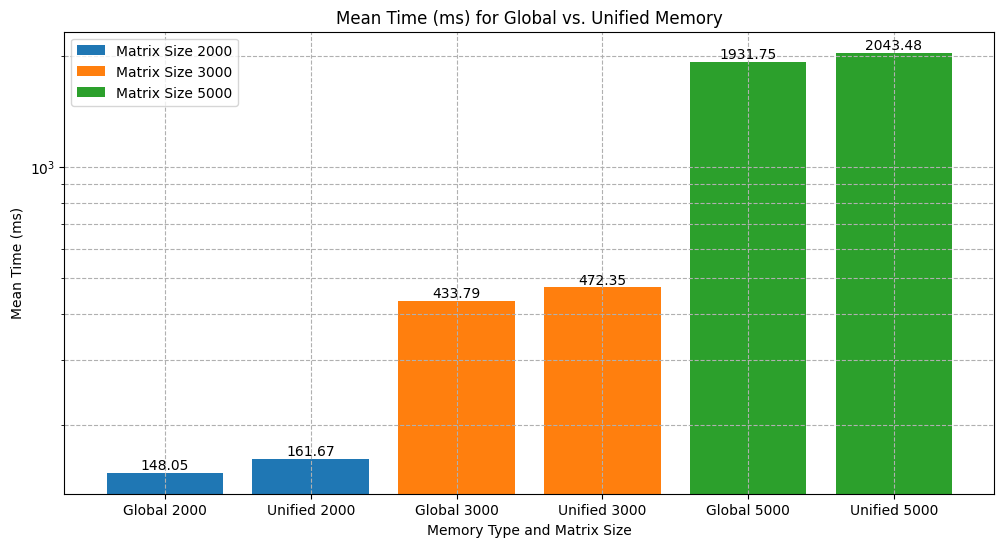

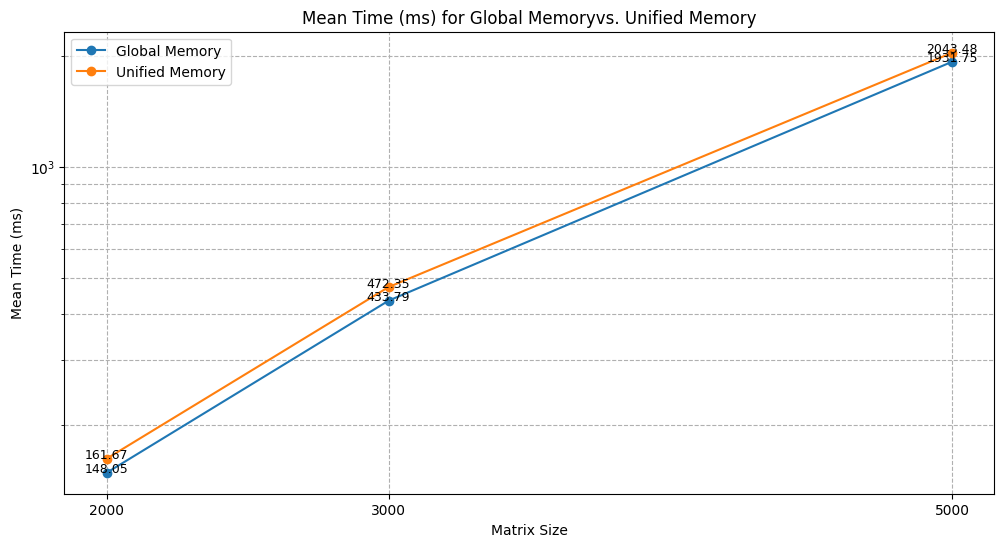

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Percorsi dei file Excel
file_global_memory = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_configurations.xlsx"
file_unified_memory = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_unified_memory.xlsx"

# Leggere i dati dai file Excel
df_global = pd.read_excel(file_global_memory)
df_unified = pd.read_excel(file_unified_memory)

# Filtrare i dati per Tile Size = 32 per Global Memory
df_global = df_global[df_global['Tile Size'] == 32]

# Aggiungere una colonna per identificare la memoria utilizzata
df_global['Memory'] = 'Global'
df_unified['Memory'] = 'Unified'

# Combinare i dati in un unico DataFrame
df_combined = pd.concat([df_global, df_unified])

# Grafico a barre: Confronto dei tempi di esecuzione tra Global e Unified Memory
plt.figure(figsize=(12, 6))
bars = []
for matrix_size in df_combined['Matrix Size'].unique():
    df_filtered = df_combined[df_combined['Matrix Size'] == matrix_size]
    bar = plt.bar(df_filtered['Memory'] + ' ' + df_filtered['Matrix Size'].astype(str), df_filtered['Mean Time (ms)'], label=f'Matrix Size {matrix_size}')
    bars.append(bar)

# Aggiungere etichette ai valori delle barre
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Memory Type and Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Global vs. Unified Memory')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\global_vs_unified_memory_bar.png')
plt.show()

# Grafico a linee: Confronto dei tempi di esecuzione tra Global e Unified Memory
plt.figure(figsize=(12, 6))
for memory_type in df_combined['Memory'].unique():
    df_filtered = df_combined[df_combined['Memory'] == memory_type]
    plt.plot(df_filtered['Matrix Size'], df_filtered['Mean Time (ms)'], marker='o', label=f'{memory_type} Memory')
    for i, row in df_filtered.iterrows():
        plt.text(row['Matrix Size'], row['Mean Time (ms)'], f"{row['Mean Time (ms)']:.2f}", fontsize=9, ha='center')
    
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Global Memoryvs. Unified Memory')
plt.yscale('log')
plt.xticks(df_combined['Matrix Size'].unique())
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\global_vs_unified_memory_line.png')
plt.show()


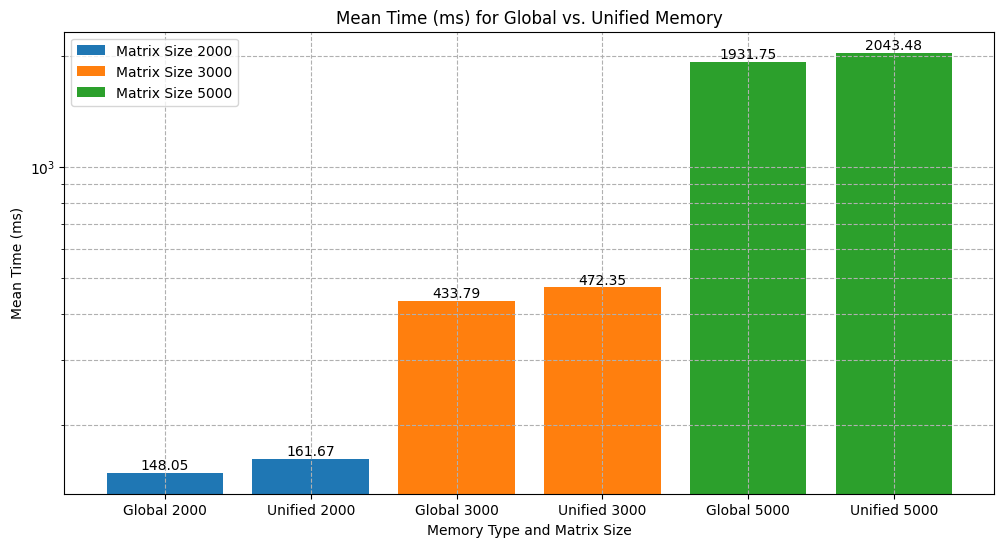

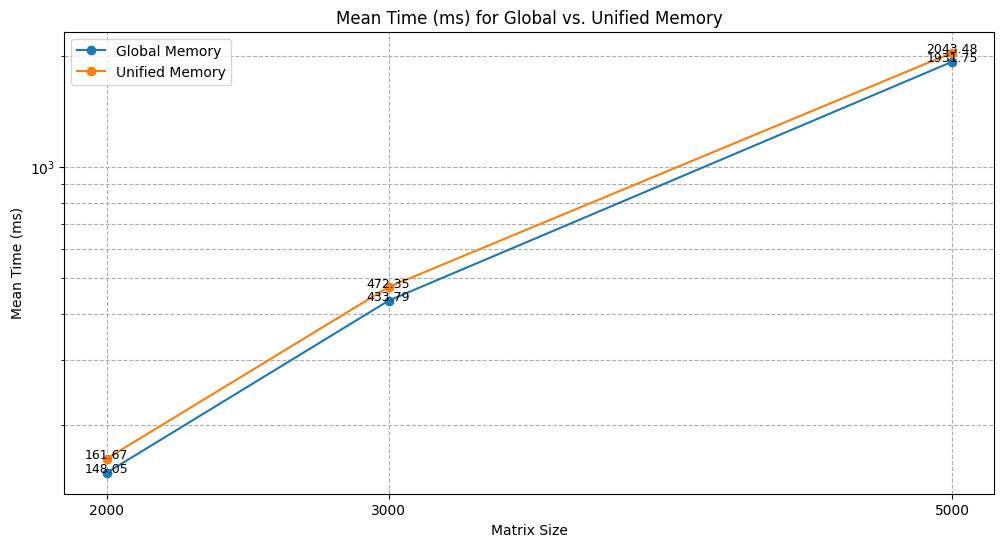

<Figure size 1200x600 with 0 Axes>

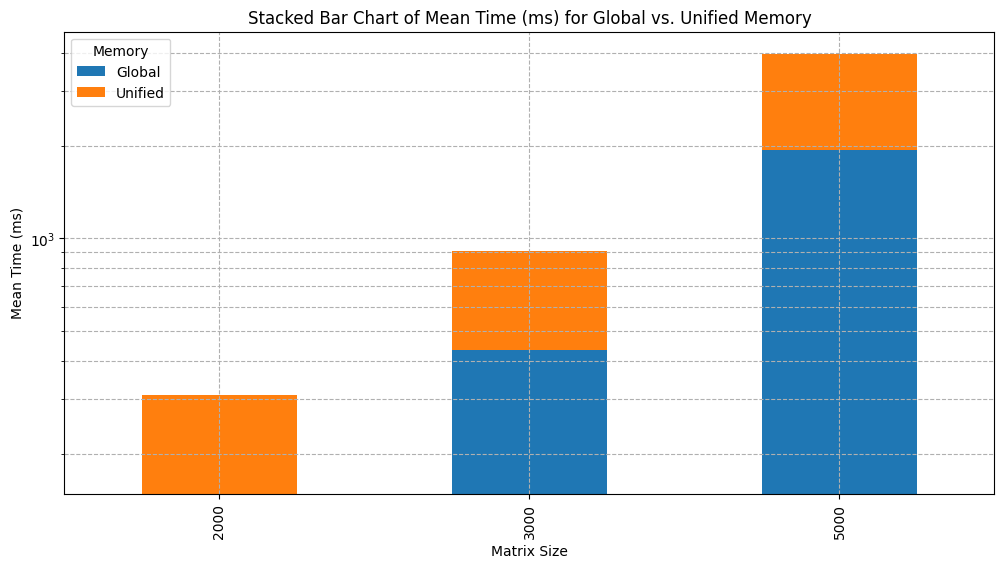

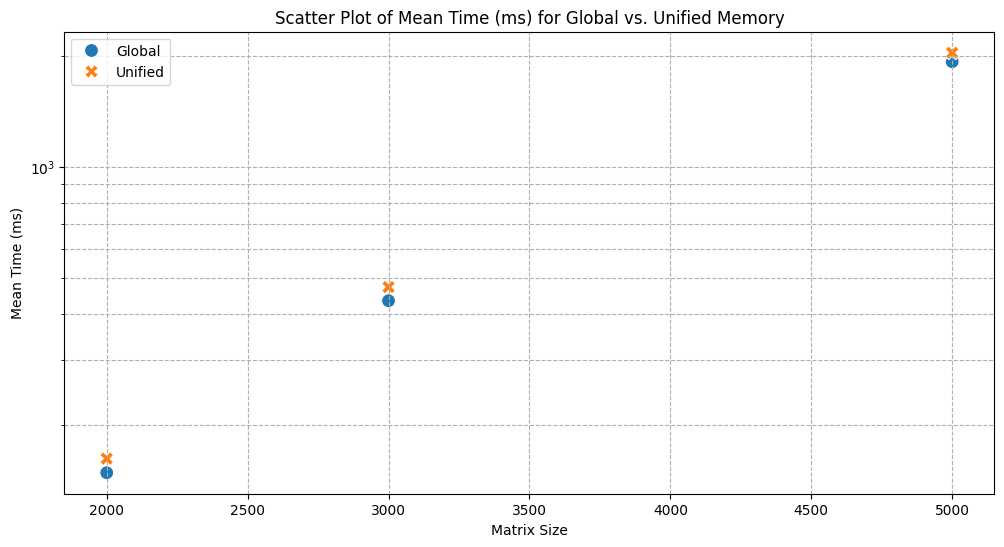

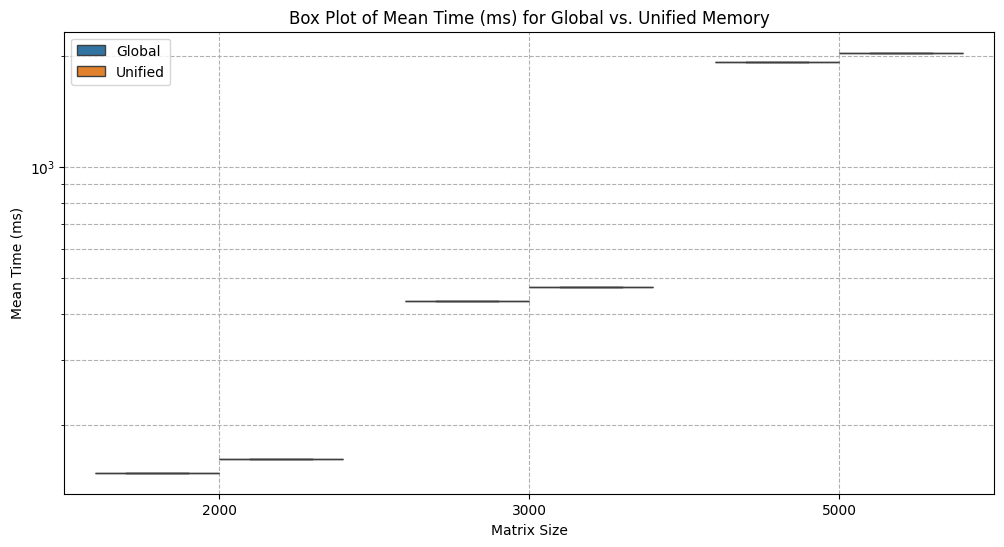

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Percorsi dei file Excel
file_global_memory = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_configurations.xlsx"
file_unified_memory = "C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\extracted_data_table\\tile_matrix_unified_memory.xlsx"

# Leggere i dati dai file Excel
df_global = pd.read_excel(file_global_memory)
df_unified = pd.read_excel(file_unified_memory)

# Filtrare i dati per Tile Size = 32 per Global Memory
df_global = df_global[df_global['Tile Size'] == 32]

# Aggiungere una colonna per identificare la memoria utilizzata
df_global['Memory'] = 'Global'
df_unified['Memory'] = 'Unified'

# Combinare i dati in un unico DataFrame
df_combined = pd.concat([df_global, df_unified])

# Grafico a Barre: Confronto dei Tempi Medi di Esecuzione
plt.figure(figsize=(12, 6))
bars = []
for matrix_size in df_combined['Matrix Size'].unique():
    df_filtered = df_combined[df_combined['Matrix Size'] == matrix_size]
    bar = plt.bar(df_filtered['Memory'] + ' ' + df_filtered['Matrix Size'].astype(str), df_filtered['Mean Time (ms)'], label=f'Matrix Size {matrix_size}')
    bars.append(bar)

# Aggiungere etichette ai valori delle barre
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Memory Type and Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Global vs. Unified Memory')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\global_vs_unified_memory_bar.png')
plt.show()

# Grafico a Linee: Confronto dei Tempi Medi di Esecuzione
plt.figure(figsize=(12, 6))
for memory_type in df_combined['Memory'].unique():
    df_filtered = df_combined[df_combined['Memory'] == memory_type]
    plt.plot(df_filtered['Matrix Size'], df_filtered['Mean Time (ms)'], marker='o', label=f'{memory_type} Memory')
    for i, row in df_filtered.iterrows():
        plt.text(row['Matrix Size'], row['Mean Time (ms)'], f"{row['Mean Time (ms)']:.2f}", fontsize=9, ha='center')
    
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Mean Time (ms) for Global vs. Unified Memory')
plt.yscale('log')
plt.xticks(df_combined['Matrix Size'].unique())
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\global_vs_unified_memory_line.png')
plt.show()

# Grafico a Barre Empilato
plt.figure(figsize=(12, 6))
df_pivot = df_combined.pivot(index='Matrix Size', columns='Memory', values='Mean Time (ms)')
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Stacked Bar Chart of Mean Time (ms) for Global vs. Unified Memory')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\stacked_bar_global_vs_unified_memory.png')
plt.show()

# Grafico a Dispersione (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='Matrix Size', y='Mean Time (ms)', hue='Memory', style='Memory', s=100)
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Scatter Plot of Mean Time (ms) for Global vs. Unified Memory')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\scatter_plot_global_vs_unified_memory.png')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x='Matrix Size', y='Mean Time (ms)', hue='Memory')
plt.xlabel('Matrix Size')
plt.ylabel('Mean Time (ms)')
plt.title('Box Plot of Mean Time (ms) for Global vs. Unified Memory')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig('C:\\Users\\ACER\\Desktop\\UNIGE MAGISTRALE 1 ANNO\\1 SEMESTRE\\HIGH PERFORMANCE COMPUTING\\ESAME 2\\Results\\box_plot_global_vs_unified_memory.png')
plt.show()


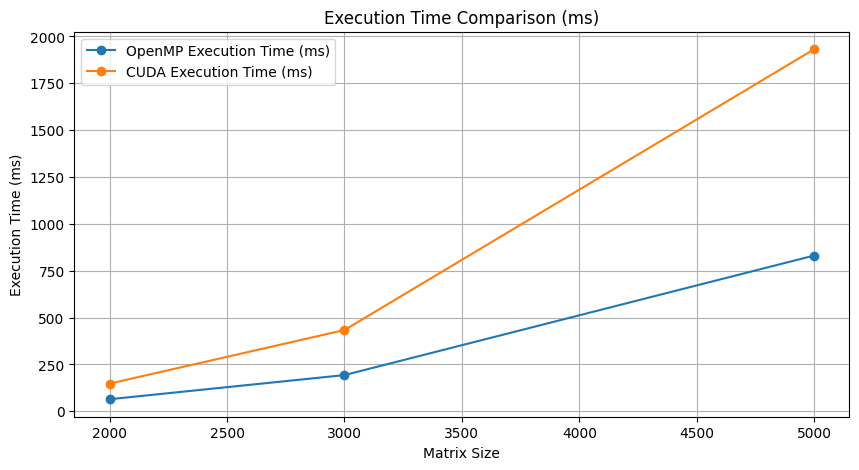

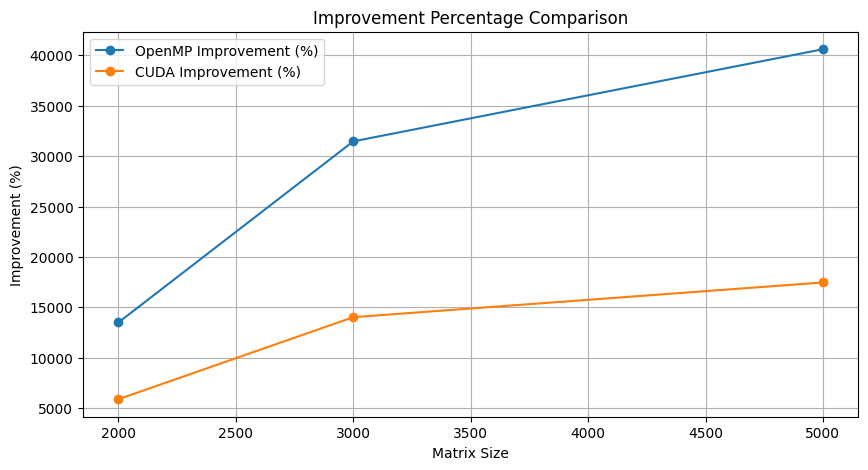

In [2]:
import matplotlib.pyplot as plt

# Data
matrix_size = [2000, 3000, 5000]
openmp_time = [64.6, 193.4, 831.2]
cuda_time = [148.0, 433.8, 1931.7]
openmp_improvement = [13500.93, 31461.94, 40602.26]
cuda_improvement = [5891, 14027, 17471]

# Execution Time Comparison (Line Chart)
plt.figure(figsize=(10, 5))
plt.plot(matrix_size, openmp_time, marker='o', label='OpenMP Execution Time (ms)')
plt.plot(matrix_size, cuda_time, marker='o', label='CUDA Execution Time (ms)')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time Comparison (ms)')
plt.legend()
plt.grid(True)
plt.savefig('execution_time_comparison_line.png')
plt.show()

# Improvement Percentage Comparison (Line Chart)
plt.figure(figsize=(10, 5))
plt.plot(matrix_size, openmp_improvement, marker='o', label='OpenMP Improvement (%)')
plt.plot(matrix_size, cuda_improvement, marker='o', label='CUDA Improvement (%)')
plt.xlabel('Matrix Size')
plt.ylabel('Improvement (%)')
plt.title('Improvement Percentage Comparison')
plt.legend()
plt.grid(True)
plt.savefig('improvement_percentage_comparison_line.png')
plt.show()
